### Урок 7. Многомерный статистический анализ. Линейная регрессия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
X_zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [3]:
Y_ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$



$$r_{xy} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2 \cdot {\sum\limits_{i=1}^{n} (y_i - \overline{y})^2}}} = b \cdot {\frac{\sigma_x}{\sigma_y}}$$

## решение 1

In [4]:
zp_mean = sum(X_zp) / len(X_zp)
zp_mean

n = len(X_zp)
s = 0
for i in X_zp:
    s += (i - zp_mean)**2   
sigma_X = (s / (n-1))**0.5  ## (n - 1) формула для выборки
print(f'Среднее квадратичное отклонение = {sigma_X}')

Среднее квадратичное отклонение = 62.31318747531162


In [5]:
ks_mean = sum(Y_ks) / len(Y_ks)
ks_mean

n = len(Y_ks)
s = 0
for i in Y_ks:
    s += (i - ks_mean)**2   
sigma_Y = (s / (n-1))**0.5  ## (n - 1) формула для выборки
print(f'Среднее квадратичное отклонение = {sigma_Y}')

Среднее квадратичное отклонение = 183.99544076477068


In [6]:
sum_ks_zp = 0
for i in range(10):
    sum_ks_zp += (X_zp[i] - zp_mean) * (Y_ks[i] - ks_mean)
cov_z_k = (sum_ks_zp) / (n - 1)
cov_z_k

10175.377777777778

In [7]:
r_zp_ks = cov_z_k / (sigma_Y * sigma_X)
r_zp_ks

0.8874900920739162

In [8]:
b1 =  (sigma_Y / sigma_X)*r_zp_ks 
print(f'Коэффициент b1 = {b1}')

Коэффициент b1 = 2.6205388824027653


In [9]:
b0 = np.mean(Y_ks) - b1 * np.mean(X_zp)
print(f'Интерцепт b0 = {b0}')

Интерцепт b0 = 444.17735732435955


$$Yhat = 444.18 + 2.62 \cdot X$$

In [10]:
y_hat = b0 + b1*X_zp
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [11]:
Y_ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [12]:
mse = ((Y_ks - y_hat)**2).sum()/n
mse

6470.414201176658

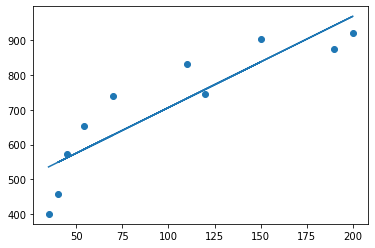

In [13]:
plt.scatter(X_zp, Y_ks)
plt.plot(X_zp,  b0 + b1*X_zp)

## Матричное решение

In [14]:
X = X_zp.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [15]:
y = Y_ks.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [16]:
X = np.hstack([np.ones((10,1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [17]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

In [144]:
B0 = 444.18
B1 = 2.62

In [149]:
mse = np.sum((y_hat - y)**2) / 10
mse

6470.414201176658

In [147]:
from sklearn.metrics import mean_squared_error

In [150]:
mean_squared_error(Y_ks,y_hat)

6470.414201176658

**Ответ:** B0 = 444.18, B1 = 2.62

## Градиентный спуск

In [343]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [344]:
def mse_(B1,X=X,y=y,n=10):
    return np.sum((B1*X-y)**2)/n

In [345]:
alpha = 1e-5

In [346]:
n = 10

In [347]:
B1 = 0

In [348]:
for i in range(1000):
    B1 -= (np.sum((B1 * X - y)*X) * alpha * 2) / 10
    if i%100==0:
        print(f'Iteration = {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration = 0, B1 = 1.6228340000000003, mse = 307349.79947739036
Iteration = 100, B1 = 5.889820420132645, mse = 56516.85841571941
Iteration = 200, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 300, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 400, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 500, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 600, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 700, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 800, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 900, B1 = 5.889820420132688, mse = 56516.8584157194


In [349]:
y_hat = X * 5.88982
y_hat

array([ 206.1437 ,  265.0419 , 1119.0658 , 1177.964  ,  235.5928 ,
        412.2874 ,  318.05028,  883.473  ,  706.7784 ,  647.8802 ])

In [350]:
mean_squared_error(Y_ks,y_hat)

56516.85841572182

**Ответ:** B1 без интерсепта = 5.8898

## * (необязательная)Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решить в итоге не получилось, но я не понял где именно "затык"

In [352]:
X = X.reshape(10,1)
X = np.hstack([np.ones((len(X),1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [353]:
def mse_(B=B,X=X,y=y,n=10):
    return np.sum(((np.dot(X, B)) - y)**2)/n

In [370]:
B = np.random.randn(2,1)
B_x = np.array([444.18, 2.62])

In [378]:
B -= ((X.T.dot(y_hat - y)) * 0.00001 * 2) / 10
B

array([[89.66719408, 89.67411408, 89.68611408, 89.68791408, 89.66951408,
        89.68071408, 89.67727408, 89.68723408, 89.68099408, 89.68443408],
       [92.66109065, 93.36277865, 94.57957865, 94.76209865, 92.89633865,
        94.03201865, 93.68320265, 94.69314665, 94.06041065, 94.40922665]])

In [357]:
mse_(B_x)

6470.417919999998

In [361]:
y_hat = np.dot(X, B_x)
y_hat

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

In [386]:
B = np.random.randn(2,1)
y_hat = np.dot(X, B)
for i in range(10000):
    B = B - ((X.T.dot(y_hat - y)) * 0.000001 * 2) / 10
    if i%1000==0:
        print(f'Iteration = {i}, B0 = {B[0][0]},B1 = {B[1][0]} mse = {mse_(B=np.array([B[0], B[1]]))}')

Iteration = 0, B0 = -0.3690641332195971,B1 = -1.1029952152859497 mse = 6984795.866003035
Iteration = 1000, B0 = 0.6806766661629844,B1 = 113.85332615825355 mse = 4206745808.294164
Iteration = 2000, B0 = 1.7304174655455657,B1 = 228.80964753179404 mse = 17443918485.014282
Iteration = 3000, B0 = 2.7801582649283123,B1 = 343.76596890533455 mse = 39718502826.02641
Iteration = 4000, B0 = 3.8298990643111157,B1 = 458.72229027887505 mse = 71030498831.32962
Iteration = 5000, B0 = 4.879639863693919,B1 = 573.678611652385 mse = 111379906500.92363
Iteration = 6000, B0 = 5.9293806630767225,B1 = 688.6349330258687 mse = 160766725834.8086
Iteration = 7000, B0 = 6.979121462459526,B1 = 803.5912543993524 mse = 219190956832.9842
Iteration = 8000, B0 = 8.02886226184233,B1 = 918.547575772836 mse = 286652599495.4477
Iteration = 9000, B0 = 9.078603061225133,B1 = 1033.5038971463198 mse = 363151653822.1981
